In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
from quanqual import QUANQUAL
quan,qual=QUANQUAL.QuanQual(dataset)

In [6]:
quan

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
#from quanqual import QUANQUAL
#descriptive=QUANQUAL.describe1(dataset)

In [ ]:
dataset.describe()

In [7]:
descriptive=pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule','Lessor','Greater','min','max'],columns=quan) 
for ColumnName in quan:
            descriptive.loc['mean',ColumnName]=dataset[ColumnName].mean()
            descriptive.loc['median',ColumnName]=dataset[ColumnName].median()
            descriptive.loc['mode',ColumnName]=dataset[ColumnName].mode()[0]
            descriptive.loc['Q1:25%',ColumnName]=dataset.describe()[ColumnName]['25%']
            descriptive.loc['Q2:50%',ColumnName]=dataset.describe()[ColumnName]['50%']
            descriptive.loc['Q3:75%',ColumnName]=dataset.describe()[ColumnName]['75%']
            descriptive.loc['Q4:100%',ColumnName]=dataset.describe()[ColumnName]['max']
            descriptive.loc['IQR',ColumnName]= descriptive[ColumnName]['Q3:75%']-descriptive[ColumnName]['Q1:25%']
            descriptive.loc['1.5rule',ColumnName]=1.5*descriptive.loc['IQR',ColumnName]
            descriptive.loc['Lessor',ColumnName]=descriptive[ColumnName]['Q1:25%']-1.5*descriptive.loc['IQR',ColumnName]
            descriptive.loc['Greater',ColumnName]=descriptive[ColumnName]['Q1:25%']+1.5*descriptive.loc['IQR',ColumnName]
            descriptive.loc['min',ColumnName]=dataset[ColumnName].min()
            descriptive.loc['max',ColumnName]=dataset[ColumnName].max()


In [8]:
descriptive

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.434146,0.69561,0.942439,131.611707,246.0,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
median,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
mode,58,1,0,120,204,0,1,162,0,0.0,1,0,2,1
Q1:25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
Q2:50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,0.8,1.0,0.0,2.0,1.0
Q3:75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.8,2.0,1.0,3.0,1.0
Q4:100%,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
IQR,13.0,1.0,2.0,20.0,64.0,0.0,1.0,34.0,1.0,1.8,1.0,1.0,1.0,1.0
1.5rule,19.5,1.5,3.0,30.0,96.0,0.0,1.5,51.0,1.5,2.7,1.5,1.5,1.5,1.5
Lessor,28.5,-1.5,-3.0,90.0,115.0,0.0,-1.5,81.0,-1.5,-2.7,-0.5,-1.5,0.5,-1.5


In [ ]:
dataset.columns

In [9]:
independant=dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [10]:
independant

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [11]:
dependant=dataset[['target']]

In [12]:
dependant

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independant,dependant,test_size=0.30,random_state=0)

In [14]:
# standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
#svm is a used to non-linear function(slu : linear,non-linear)
from sklearn.svm import SVR
regressor=SVR(kernel='rbf',C=100)
regressor.fit(X_train,Y_train)

y_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,y_pred)

r2_score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9492311271546383

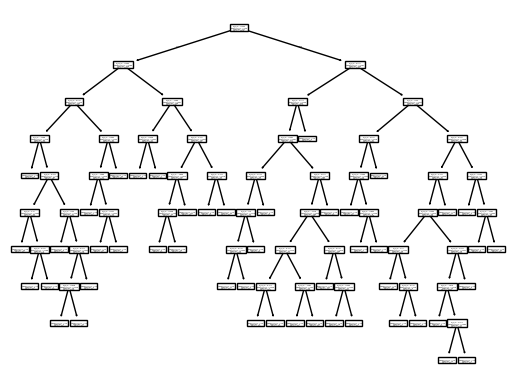

0.960905436852126

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error', splitter='best')
Dregressor=regressor.fit(X_train,Y_train)

# this libary is responce for graph purpose
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

y_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

r_score

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,Y_train)

y_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

r_score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9595501586629998

In [18]:
import pickle
filename="finalized_model_randomForest.sav"
pickle.dump(Dregressor,open(filename,"wb"))

In [19]:
loaded_model=pickle.load(open("finalized_model_randomForest.sav","rb"))
result=loaded_model.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [20]:
result

array([0.])